# The Movie Database API Exploration

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import datetime
import missingno as msno
import warnings

from config import API_Key

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# start page
PAGE = 1

url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=utf-8 -- Encoding: utf-8


In [4]:
# query first 500 pages
popular_movies = []

for PAGE in range(1, 501):
  url = url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'
  r = requests.get(url)
  popular_movies.append(r.json())

# Movies Without Release Date

In [5]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [6]:
data = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df = pd.DataFrame(data=data)
df.head()

,page_number,adult,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,1,False,338953,en,4223.547,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.8,1893
1,2,False,836225,en,1415.845,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,The Exorcism of God,6.8,245
2,3,False,810171,en,864.742,/q7FmdJHKMLIC4XgWfcFRIu2iVdL.jpg,The Valet,7.8,210
3,4,False,351286,en,579.249,/c9XxwwhPHdaImA2f1WEfEsbhaFB.jpg,Jurassic World: Fallen Kingdom,6.6,9954
4,5,False,800937,en,460.860,/6UqbcDQhCYpxboK58Z0eVfdeHcT.jpg,Senior Year,6.0,417


In [7]:
# drop page number and adult columns
df.drop(columns=['page_number', 'adult'], inplace=True)
df

,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,338953,en,4223.547,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.8,1893
1,836225,en,1415.845,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,The Exorcism of God,6.8,245
2,810171,en,864.742,/q7FmdJHKMLIC4XgWfcFRIu2iVdL.jpg,The Valet,7.8,210
3,351286,en,579.249,/c9XxwwhPHdaImA2f1WEfEsbhaFB.jpg,Jurassic World: Fallen Kingdom,6.6,9954
4,800937,en,460.860,/6UqbcDQhCYpxboK58Z0eVfdeHcT.jpg,Senior Year,6.0,417
...,...,...,...,...,...,...,...
495,9421,fr,10.742,/jCOCdWIim6upzteYswh8BpcsKWg.jpg,The Dinner Game,7.8,1522
496,837,en,10.729,/w5bqL9IiGIH0g4oq7ExFEq4KSl4.jpg,Videodrome,7.3,1645
497,310593,it,11.813,/uz4TSOwxLb8VKWAhATgi200Wxzz.jpg,Youth,6.9,1752
498,9822,en,10.693,/mvjyF85NJVWE0ipfdjoFiRNRLex.jpg,Mighty Joe Young,6.2,668


In [8]:
df.shape

(500, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   original_language  500 non-null    object 
 2   popularity         500 non-null    float64
 3   poster_path        499 non-null    object 
 4   title              500 non-null    object 
 5   vote_average       500 non-null    float64
 6   vote_count         500 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 27.5+ KB


In [10]:
df['id'] = df['id'].astype('category')                  # convert id to categorical            
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: id
Non-Null Count  Dtype   
--------------  -----   
500 non-null    category
dtypes: category(1)
memory usage: 21.2 KB


In [11]:
pd.value_counts(df.dtypes)

object      3
float64     2
category    1
int64       1
dtype: int64

In [12]:
df.describe(exclude='number')

,id,original_language,poster_path,title
count,500,500,499,500
unique,500,20,499,498
top,62,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Blade
freq,1,375,1,2


In [13]:
df.describe(include='number')

,popularity,vote_average,vote_count
count,500.000000,500.000000,500.000000
mean,48.457100,6.274800,1390.166000
std,207.386344,1.478275,2512.048591
min,7.370000,0.000000,0.000000
25%,13.121250,5.875000,115.750000
50%,18.798500,6.500000,424.500000
75%,34.294250,7.100000,1473.500000
max,4223.547000,8.600000,18717.000000


In [14]:
# helper function to plot distributions
def plotkde(data, x):
  '''
  arguments

  data: dataframe
  x: column name

  '''
  return sns.kdeplot(data=data, x=x)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

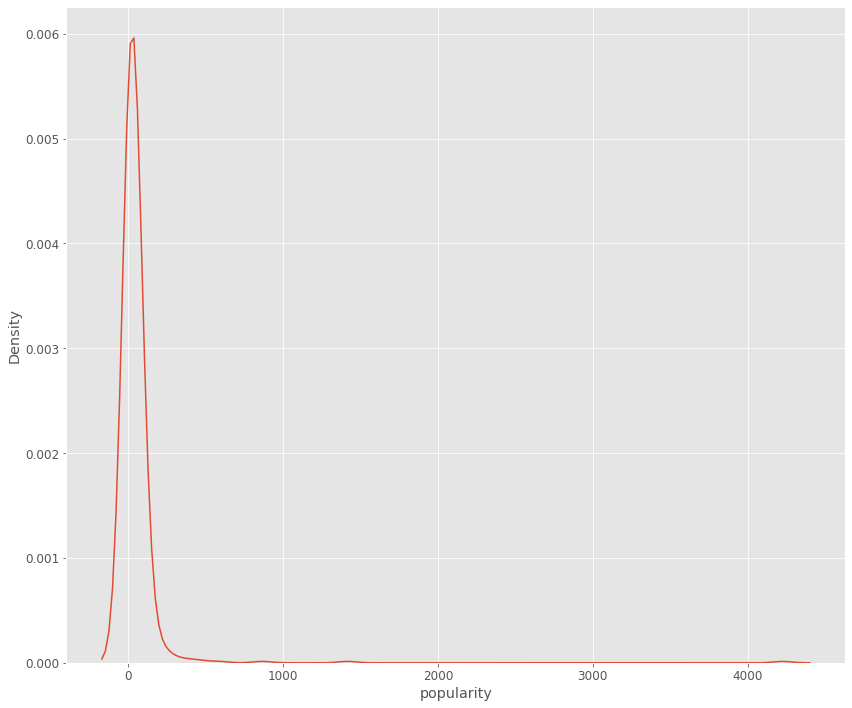

In [15]:
plotkde(data=df, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

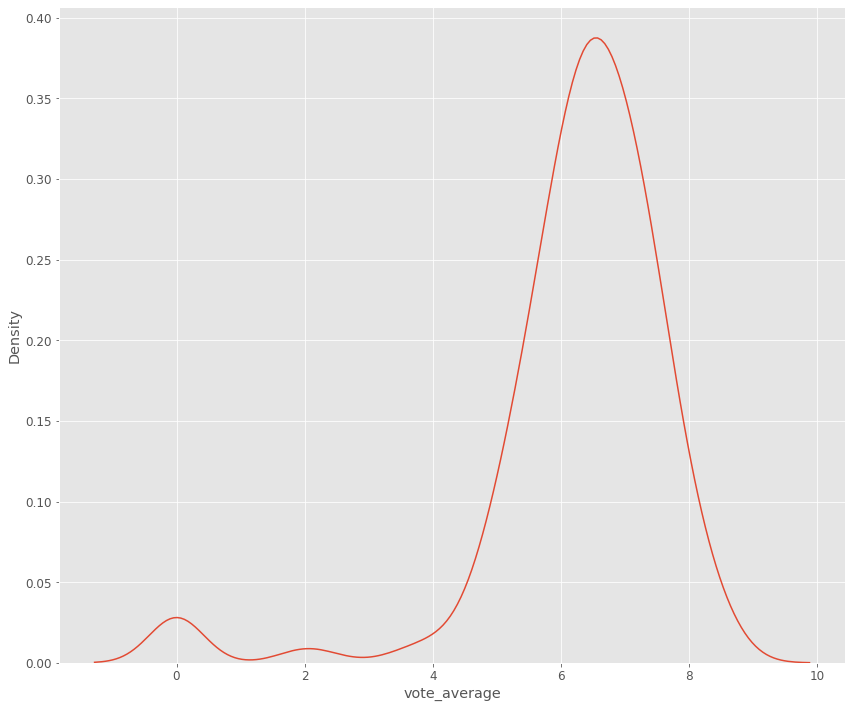

In [16]:
plotkde(data=df, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

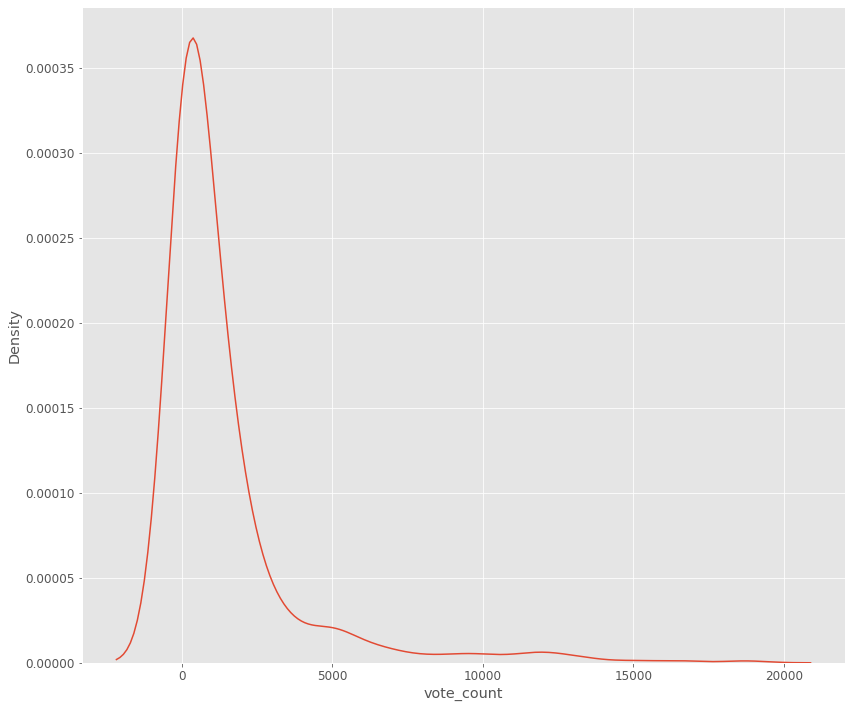

In [17]:
plotkde(data=df, x='vote_count')

# Missing Values Exploration

In [18]:
df.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          1
title                0
vote_average         0
vote_count           0
dtype: int64

<AxesSubplot:>

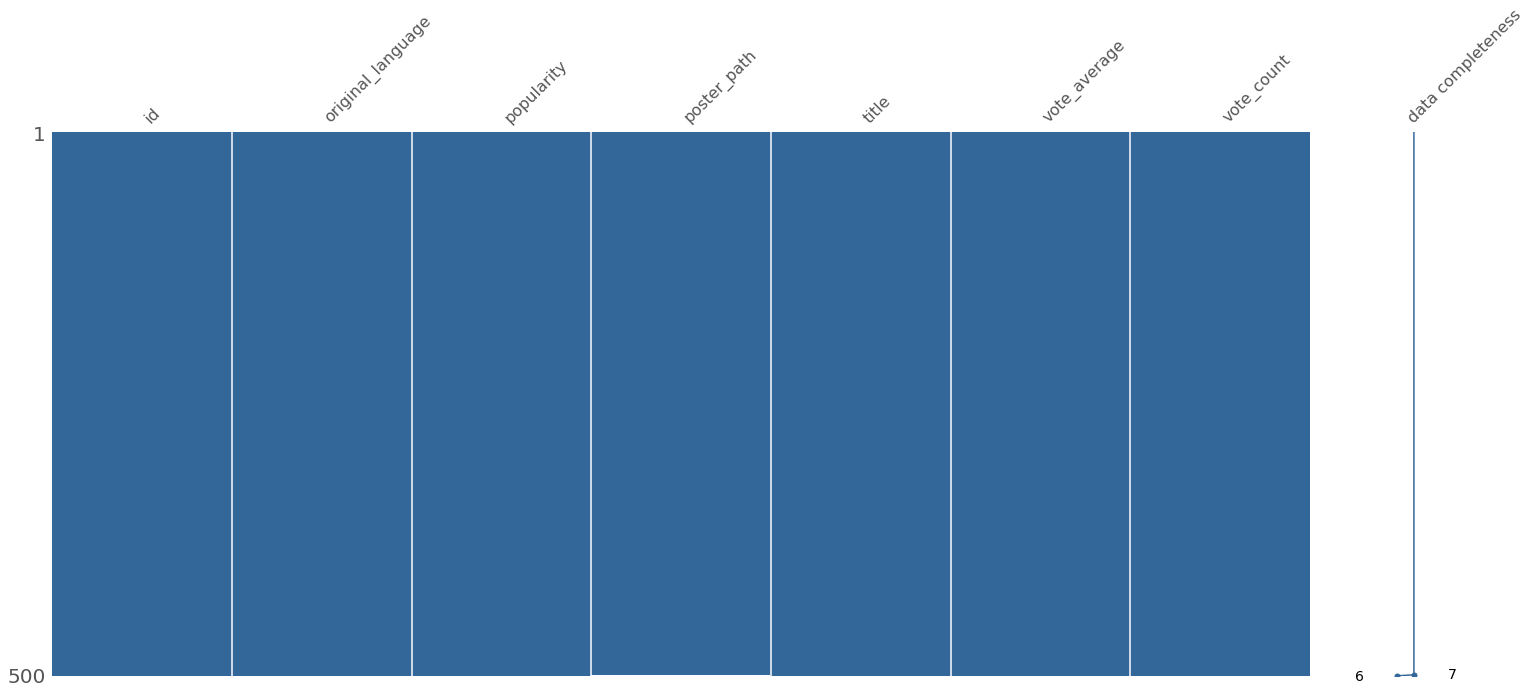

In [19]:
msno.matrix(df, labels=True, sort='descending', color=(0.2, 0.4, 0.6))

In [20]:
df.duplicated().sum()                                   # check for duplicates

0

In [21]:
df.loc[df.duplicated(subset=['id'])]                    # check where id is duplicated

,id,original_language,popularity,poster_path,title,vote_average,vote_count


[Text(0.5, 1.0, 'Count of unique original language')]

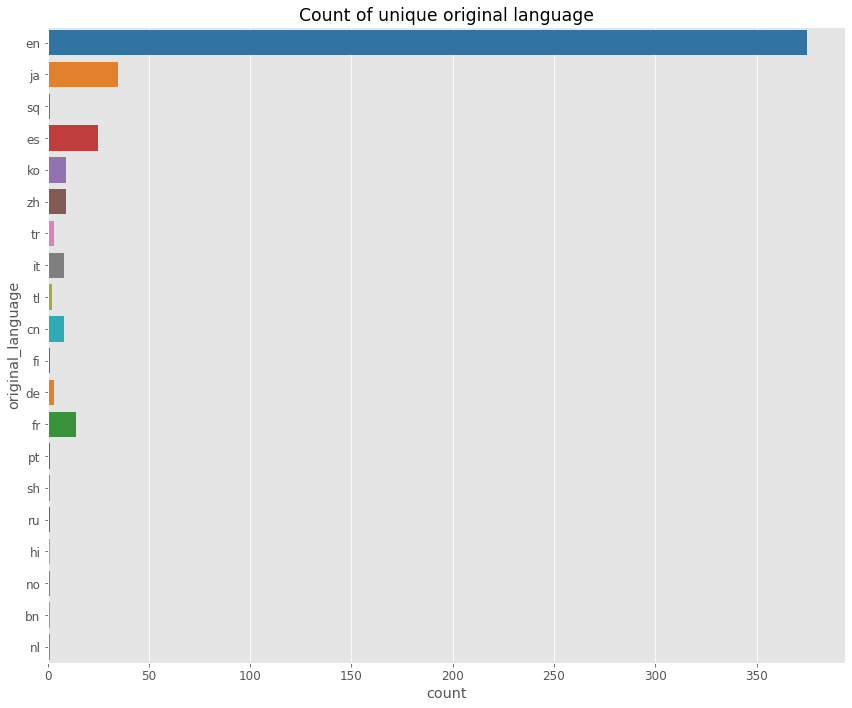

In [22]:
ax = sns.countplot(
  data=df, 
  y='original_language', palette='tab10',
)

ax.set(title='Count of unique original language')

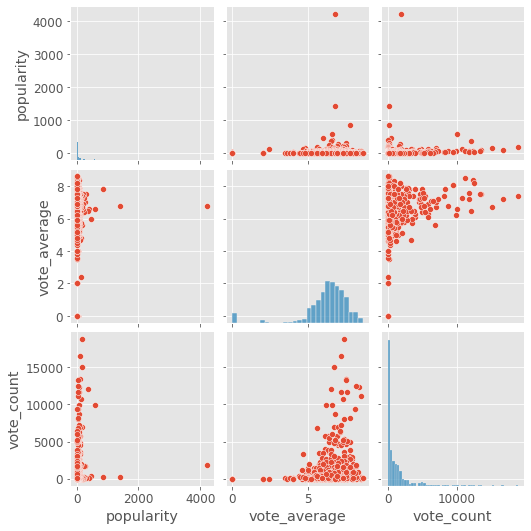

In [23]:
sns.pairplot(df)

In [24]:
df_corr = df[['popularity', 'vote_average', 'vote_count']].corr()
df_corr

,popularity,vote_average,vote_count
popularity,1.000000,0.048256,0.081971
vote_average,0.048256,1.000000,0.239633
vote_count,0.081971,0.239633,1.000000


<AxesSubplot:>

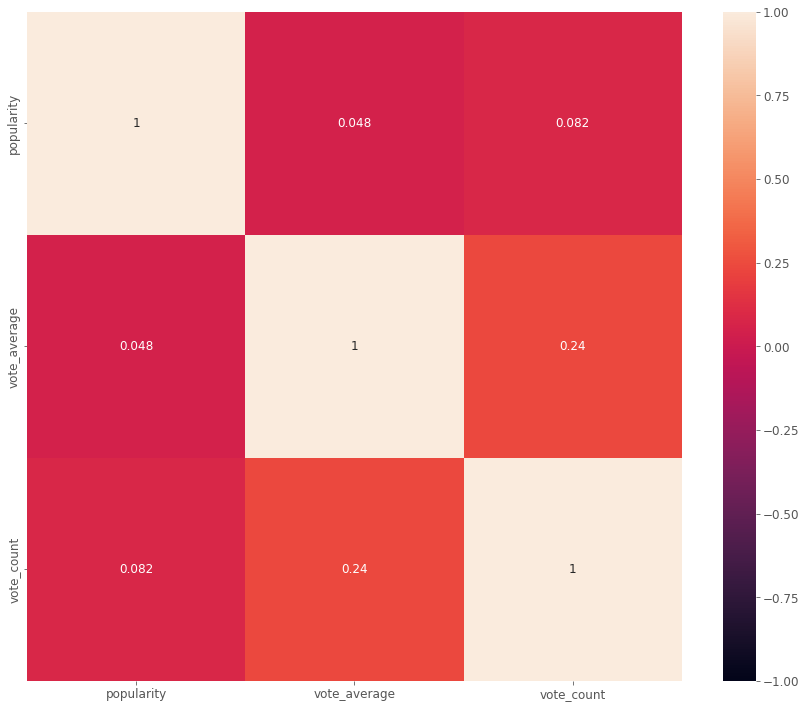

In [25]:
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)

In [26]:
from matplotlib.ticker import FuncFormatter

# set y-axis formatter
def thousand(x, pos):
  return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
  return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# bar plot helper function
def plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        data=data, 
        x=x, y=y, 
        ci=None, hue=hue, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.xaxis.set_major_formatter(formatter=formatter)

    return plot_bar

# Top 20 Movies by Popularity 

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

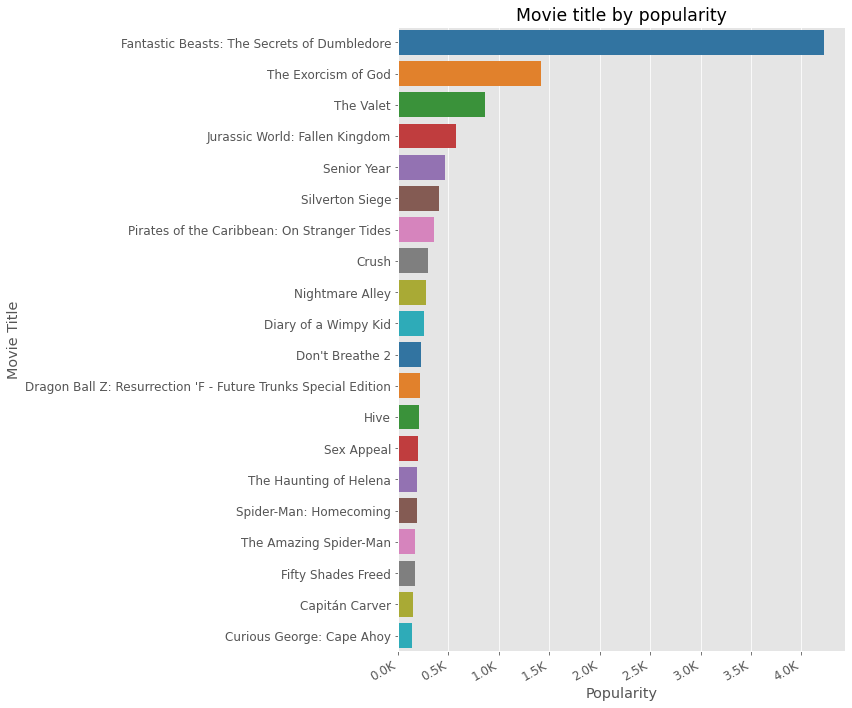

In [27]:
plot_bar(
  data=df.sort_values(by='popularity', ascending=False).head(20),
  x='popularity', y='title', 
  palette='tab10',
  title='Movie title by popularity', xlabel='Popularity', ylabel='Movie Title',
  formatter=format_tsd
)

# Top 20 Movies by Vote Count

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

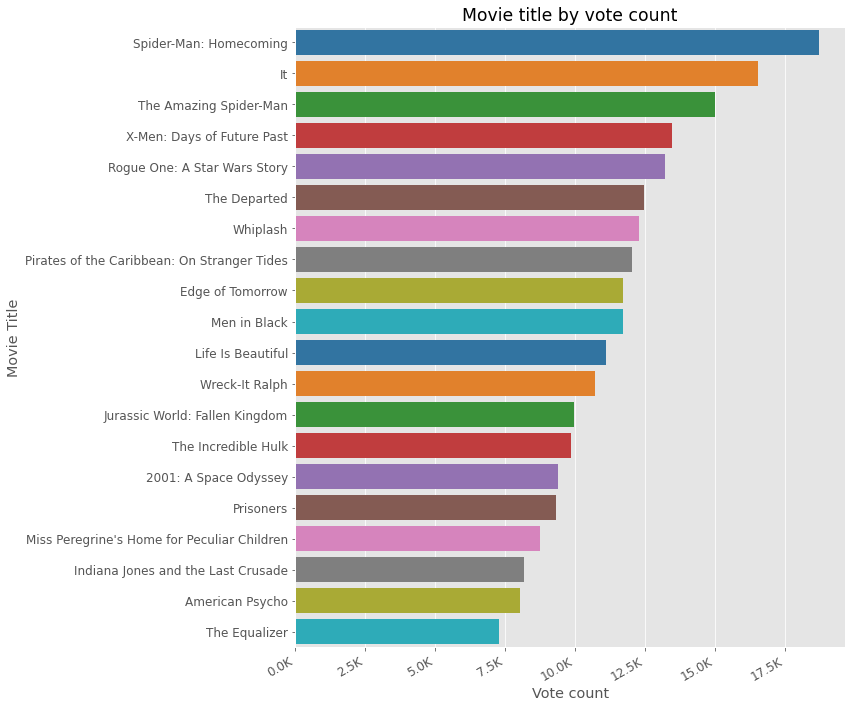

In [28]:
plot_bar(
  data=df.sort_values(by='vote_count', ascending=False).head(20),
  x='vote_count', y='title', 
  palette='tab10',
  title='Movie title by vote count', xlabel='Vote count', ylabel='Movie Title',
  formatter=format_tsd
)

# Top 20 Movies by Vote Average

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

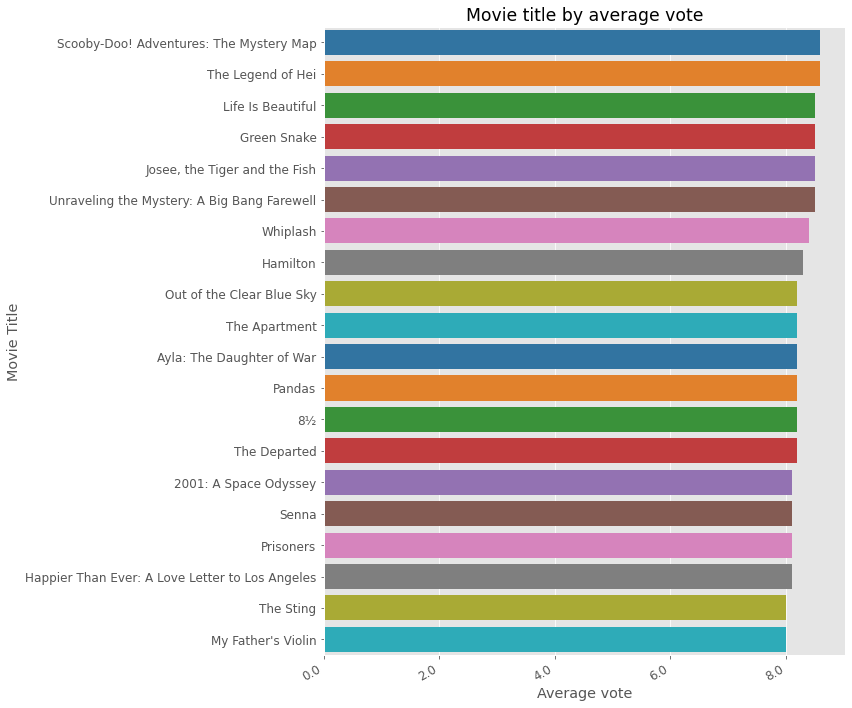

In [29]:
plot_bar(
  data=df.sort_values(by='vote_average', ascending=False).head(20),
  x='vote_average', y='title', 
  palette='tab10',
  title='Movie title by average vote', xlabel='Average vote', ylabel='Movie Title',
  formatter=format_orig
)

# Movies With Release Date

In [30]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
release_date = []
title = []
vote_average = []
vote_count = []

# query first 250 pages in popular movies
for pg in popular_movies[:250]:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  rel_date = release_date.append(pg['results'][0]['release_date']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [31]:
data1 = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'release_date': release_date,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df1 = pd.DataFrame(data=data1)
df1.head()

,page_number,adult,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,1,False,338953,en,4223.547,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.8,1893
1,2,False,836225,en,1415.845,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,2022-03-11,The Exorcism of God,6.8,245
2,3,False,810171,en,864.742,/q7FmdJHKMLIC4XgWfcFRIu2iVdL.jpg,2022-05-11,The Valet,7.8,210
3,4,False,351286,en,579.249,/c9XxwwhPHdaImA2f1WEfEsbhaFB.jpg,2018-06-06,Jurassic World: Fallen Kingdom,6.6,9954
4,5,False,800937,en,460.860,/6UqbcDQhCYpxboK58Z0eVfdeHcT.jpg,2022-05-11,Senior Year,6.0,417


In [32]:
# drop page number and adult columns
df1.drop(columns=['page_number', 'adult'], inplace=True)
df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,338953,en,4223.547,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.8,1893
1,836225,en,1415.845,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,2022-03-11,The Exorcism of God,6.8,245
2,810171,en,864.742,/q7FmdJHKMLIC4XgWfcFRIu2iVdL.jpg,2022-05-11,The Valet,7.8,210
3,351286,en,579.249,/c9XxwwhPHdaImA2f1WEfEsbhaFB.jpg,2018-06-06,Jurassic World: Fallen Kingdom,6.6,9954
4,800937,en,460.860,/6UqbcDQhCYpxboK58Z0eVfdeHcT.jpg,2022-05-11,Senior Year,6.0,417


In [33]:
df1.shape

(250, 8)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 250 non-null    int64  
 1   original_language  250 non-null    object 
 2   popularity         250 non-null    float64
 3   poster_path        250 non-null    object 
 4   release_date       250 non-null    object 
 5   title              250 non-null    object 
 6   vote_average       250 non-null    float64
 7   vote_count         250 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.8+ KB


In [35]:
pd.value_counts(df1.dtypes)

object     4
int64      2
float64    2
dtype: int64

In [36]:
df1['id'] = df1['id'].astype('category')                        # convert id to categorical            
df1['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 250 entries, 0 to 249
Series name: id
Non-Null Count  Dtype   
--------------  -----   
250 non-null    category
dtypes: category(1)
memory usage: 10.7 KB


In [37]:
df1['release_date'] = pd.to_datetime(df1['release_date'])       # convert release date to datetime
df1.dtypes

id                         category
original_language            object
popularity                  float64
poster_path                  object
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [38]:
df1['year'] = df1['release_date'].dt.year                       # extract year
df1['month'] = df1['release_date'].dt.month                     # extract month
df1['day'] = df1['release_date'].dt.day                         # extract day
df1['day_name'] = df1['release_date'].dt.day_name()             # extract day name
df1['week'] = df1['release_date'].dt.week                       # extract week
df1['quarter']= df1['release_date'].dt.quarter                  # extract quarter

df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,338953,en,4223.547,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.8,1893,2022.0,4.0,6.0,Wednesday,14.0,2.0
1,836225,en,1415.845,/hangTmbxpSV4gpHG7MgSlCWSSFa.jpg,2022-03-11,The Exorcism of God,6.8,245,2022.0,3.0,11.0,Friday,10.0,1.0
2,810171,en,864.742,/q7FmdJHKMLIC4XgWfcFRIu2iVdL.jpg,2022-05-11,The Valet,7.8,210,2022.0,5.0,11.0,Wednesday,19.0,2.0
3,351286,en,579.249,/c9XxwwhPHdaImA2f1WEfEsbhaFB.jpg,2018-06-06,Jurassic World: Fallen Kingdom,6.6,9954,2018.0,6.0,6.0,Wednesday,23.0,2.0
4,800937,en,460.860,/6UqbcDQhCYpxboK58Z0eVfdeHcT.jpg,2022-05-11,Senior Year,6.0,417,2022.0,5.0,11.0,Wednesday,19.0,2.0


In [39]:
df1.describe(exclude='number')

,id,original_language,poster_path,release_date,title,day_name
count,250.0,250,250,249,250,249
unique,250.0,12,250,240,249,7
top,62.0,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-05-11 00:00:00,Diary of a Wimpy Kid,Friday
freq,1.0,198,1,2,2,87
first,NaN,NaN,NaN,1937-12-21 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2022-09-23 00:00:00,NaN,NaN


In [40]:
df1.drop(columns=['year', 'month', 'day', 'week', 'quarter']).describe(include='number')

,popularity,vote_average,vote_count
count,250.000000,250.000000,250.000000
mean,83.306236,6.455200,2169.380000
std,289.386583,1.216054,3279.064287
min,13.542000,0.000000,0.000000
25%,24.674250,6.000000,120.250000
50%,34.335500,6.500000,862.500000
75%,65.129250,7.200000,2553.500000
max,4223.547000,8.500000,18717.000000


<AxesSubplot:xlabel='popularity', ylabel='Density'>

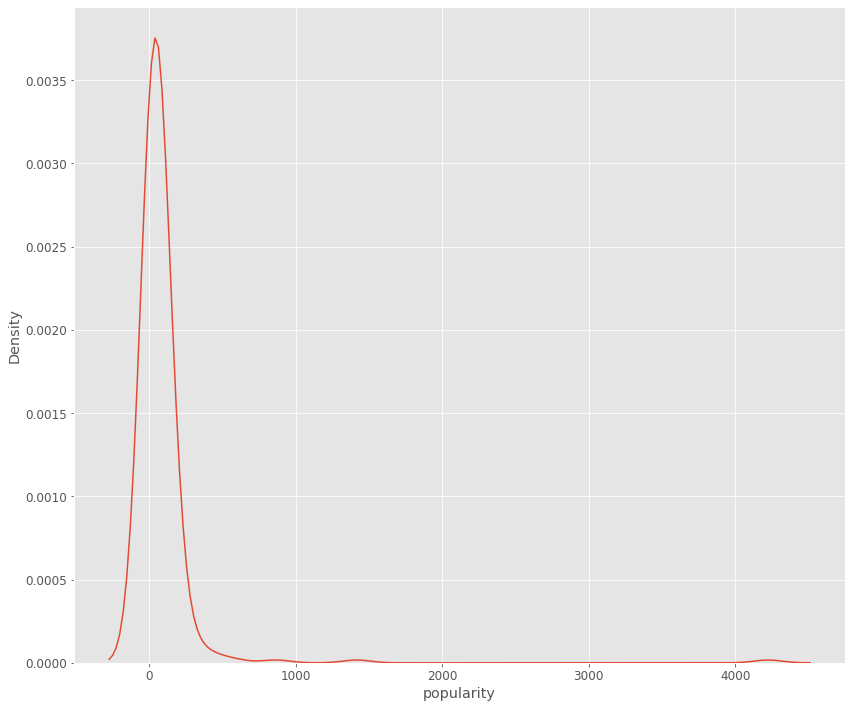

In [41]:
plotkde(data=df1, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

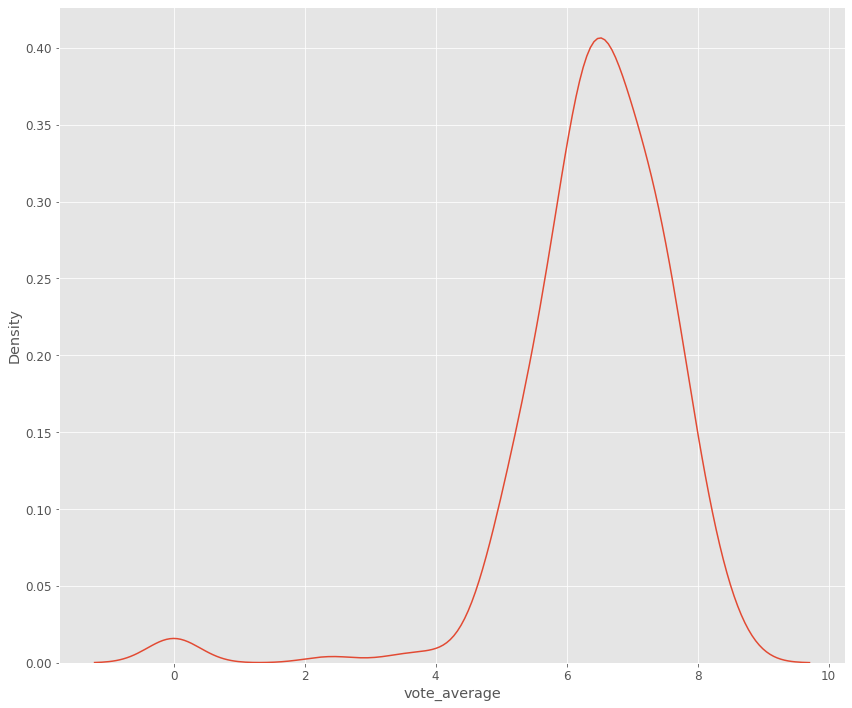

In [42]:
plotkde(data=df1, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

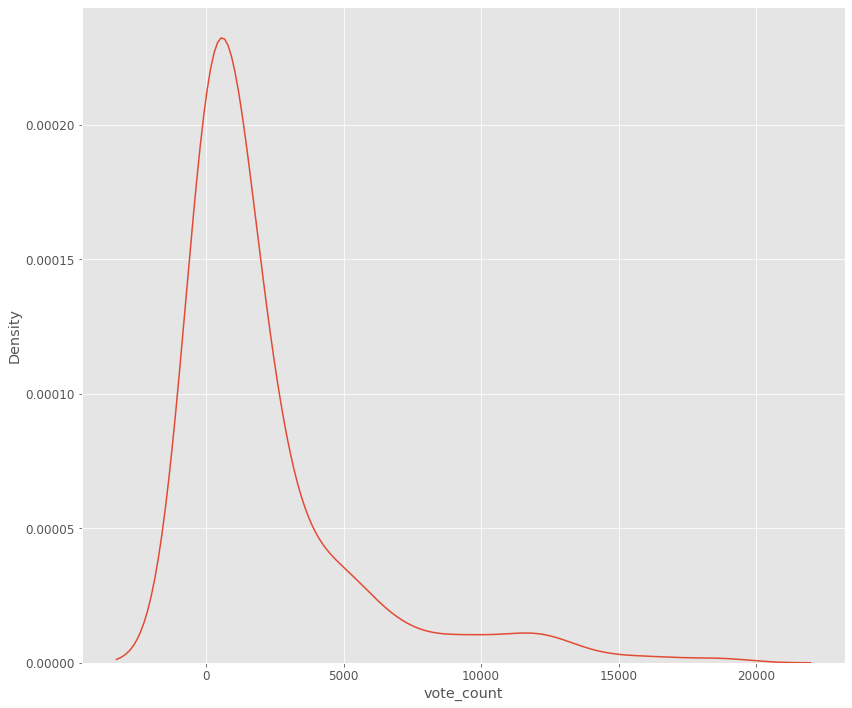

In [43]:
plotkde(data=df1, x='vote_count')

# Missing Values Exploration

In [44]:
df1.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          0
release_date         1
title                0
vote_average         0
vote_count           0
year                 1
month                1
day                  1
day_name             1
week                 1
quarter              1
dtype: int64

<AxesSubplot:>

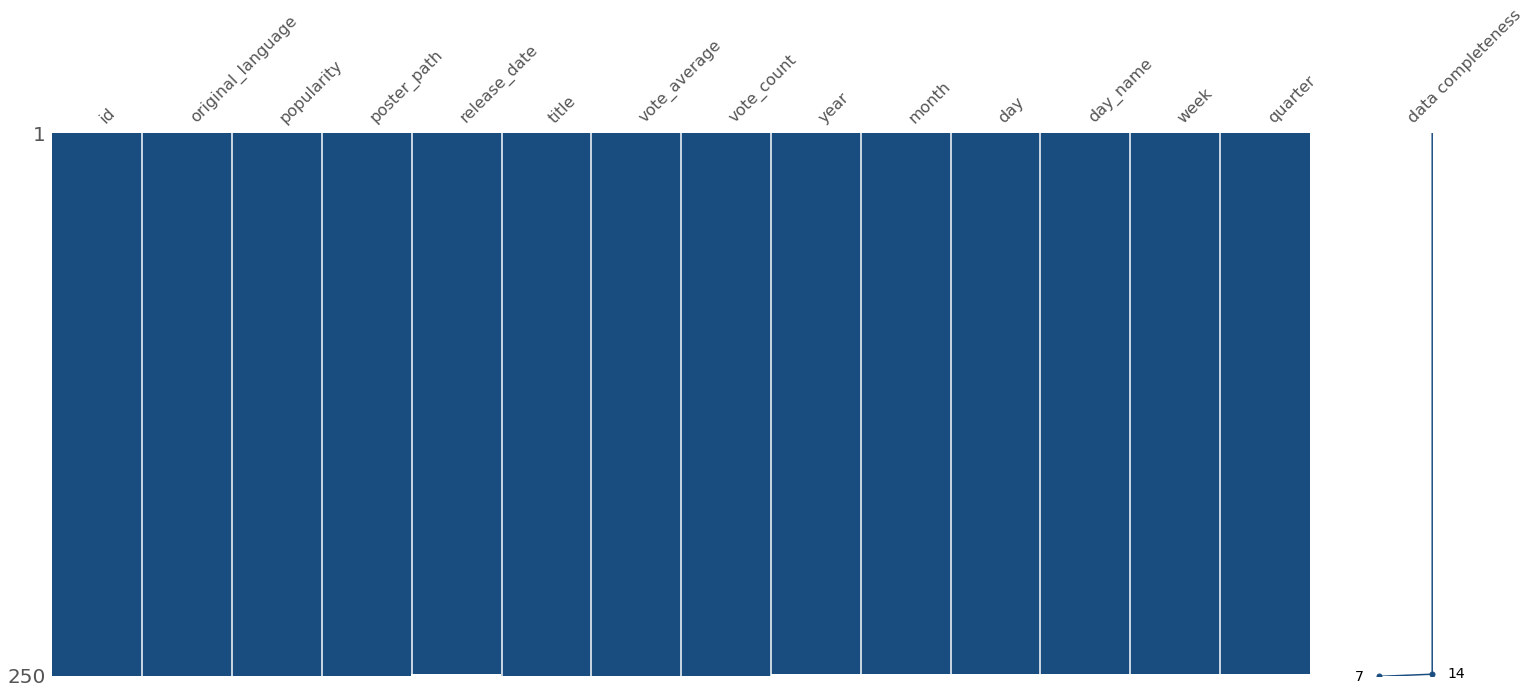

In [45]:
msno.matrix(df1, labels=True, sort='descending', color=(0.1, 0.3, 0.5))

In [46]:
df1.duplicated().sum()                                # check for duplicates

0

In [47]:
df1.loc[df1.duplicated(subset=['id'])]                 # check where id is duplicated

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter


[Text(0.5, 1.0, 'Count of unique original language')]

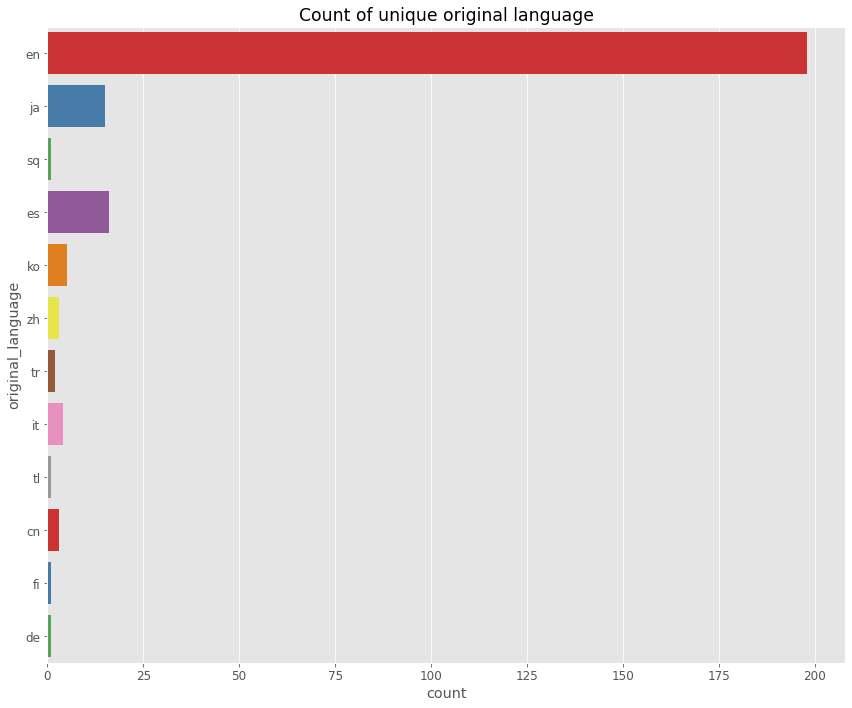

In [48]:
ax1 = sns.countplot(
  data=df1,
  y='original_language', palette='Set1',
)

ax1.set(title='Count of unique original language')

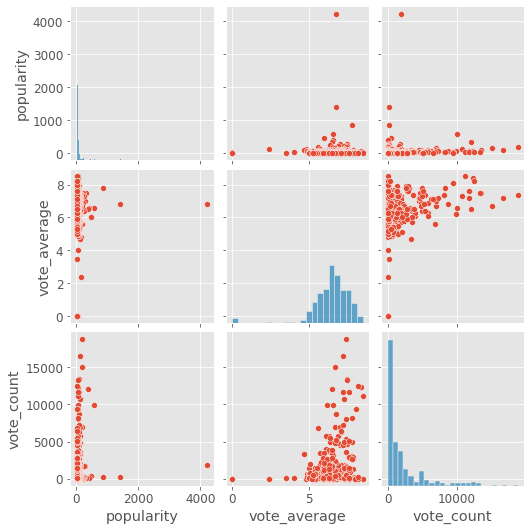

In [49]:
sns.pairplot(df1[['popularity', 'vote_average', 'vote_count']])

In [50]:
df_corr1 = df1[['popularity', 'vote_average', 'vote_count']].corr()
df_corr1

,popularity,vote_average,vote_count
popularity,1.000000,0.048093,0.032315
vote_average,0.048093,1.000000,0.278150
vote_count,0.032315,0.278150,1.000000


<AxesSubplot:>

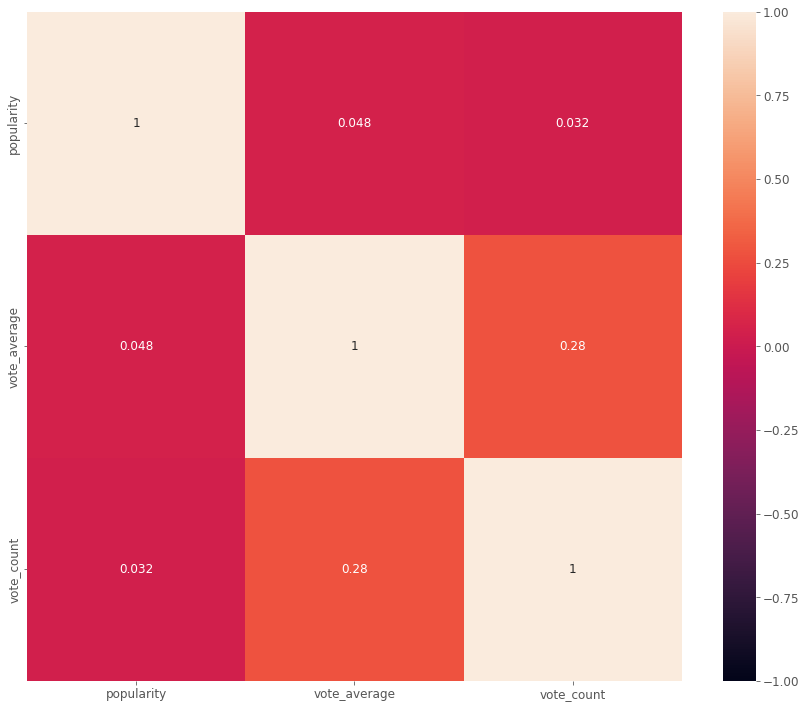

In [51]:
sns.heatmap(df_corr1, annot=True, vmin=-1, vmax=1)

<AxesSubplot:xlabel='year', ylabel='popularity'>

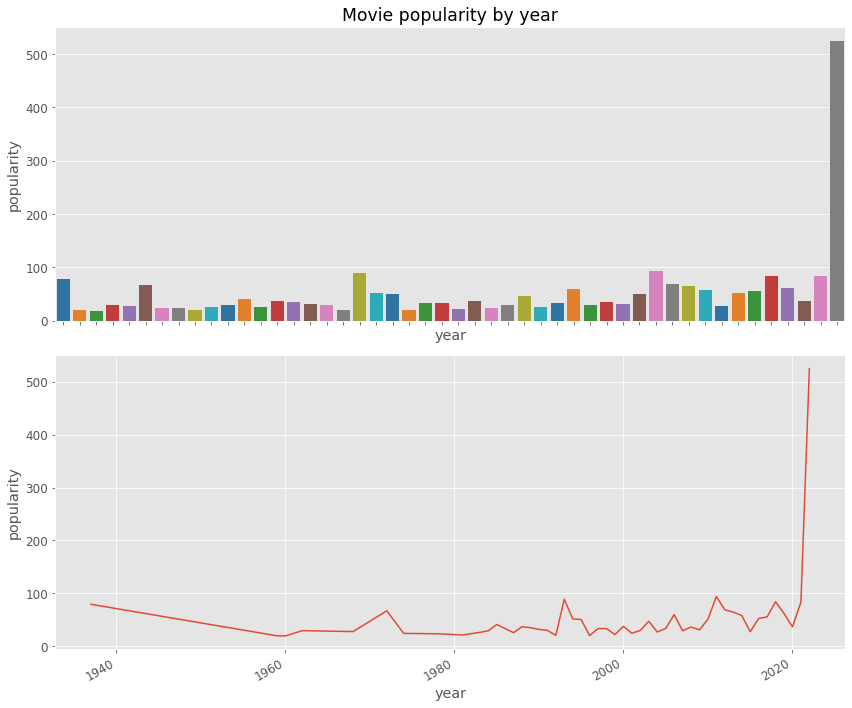

In [52]:
# create figure and axis
fig, (axs1, axs2) = plt.subplots(2, 1)
fig.autofmt_xdate()

sns.barplot(
  data=df1,
  x='year', y='popularity', ci=None,
  palette='tab10', 
  ax=axs1
)

# label plot title
axs1.set(title='Movie popularity by year')

sns.lineplot(
  data=df1,
  x='year', y='popularity', ci=None,
  palette='tab10',
  ax=axs2
)

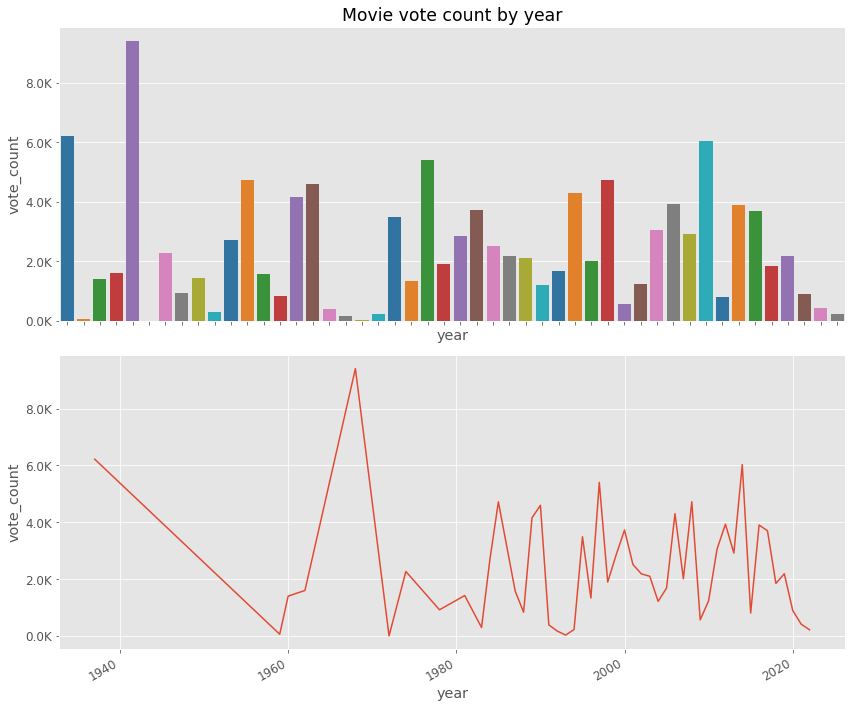

In [53]:
# create figure and axis
fig, (axs1, axs2) = plt.subplots(2, 1)
fig.autofmt_xdate()

sns.barplot(
  data=df1,
  x='year', y='vote_count', ci=None,
  palette='tab10', 
  ax=axs1
)

# label plot title
axs1.set(title='Movie vote count by year')

sns.lineplot(
  data=df1,
  x='year', y='vote_count', ci=None,
  palette='tab10',
  ax=axs2
)

# format yaxis
for axs in axs1, axs2:
  axs.yaxis.set_major_formatter(format_tsd)

<AxesSubplot:xlabel='year', ylabel='vote_average'>

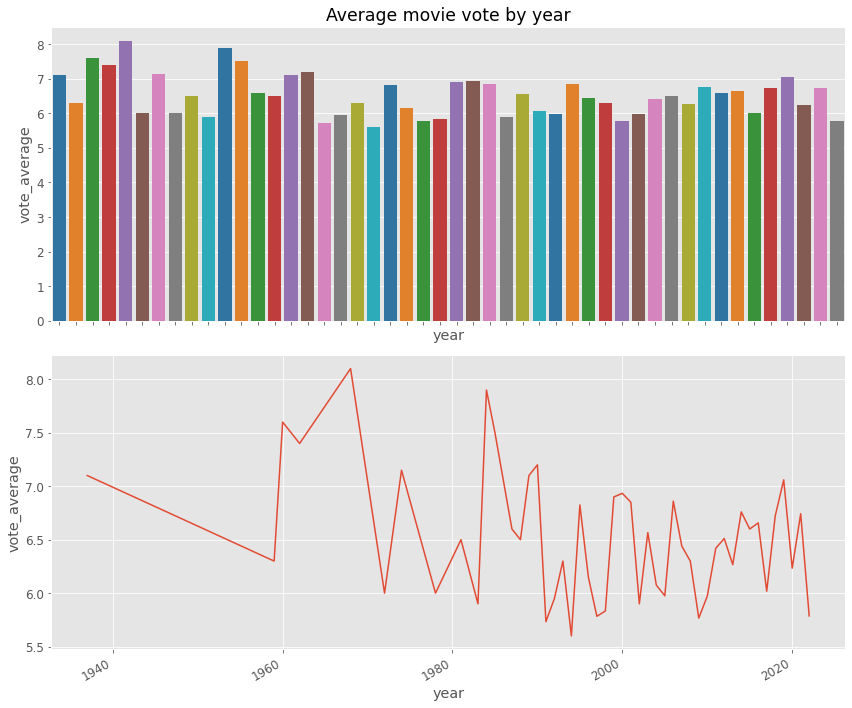

In [54]:
# create figure and axis
fig, (axs1, axs2) = plt.subplots(2, 1)
fig.autofmt_xdate()

sns.barplot(
  data=df1,
  x='year', y='vote_average', ci=None,
  palette='tab10', 
  ax=axs1
)

# label plot title
axs1.set(title='Average movie vote by year')

sns.lineplot(
  data=df1,
  x='year', y='vote_average', ci=None,
  palette='tab10',
  ax=axs2
)

<AxesSubplot:xlabel='month', ylabel='popularity'>

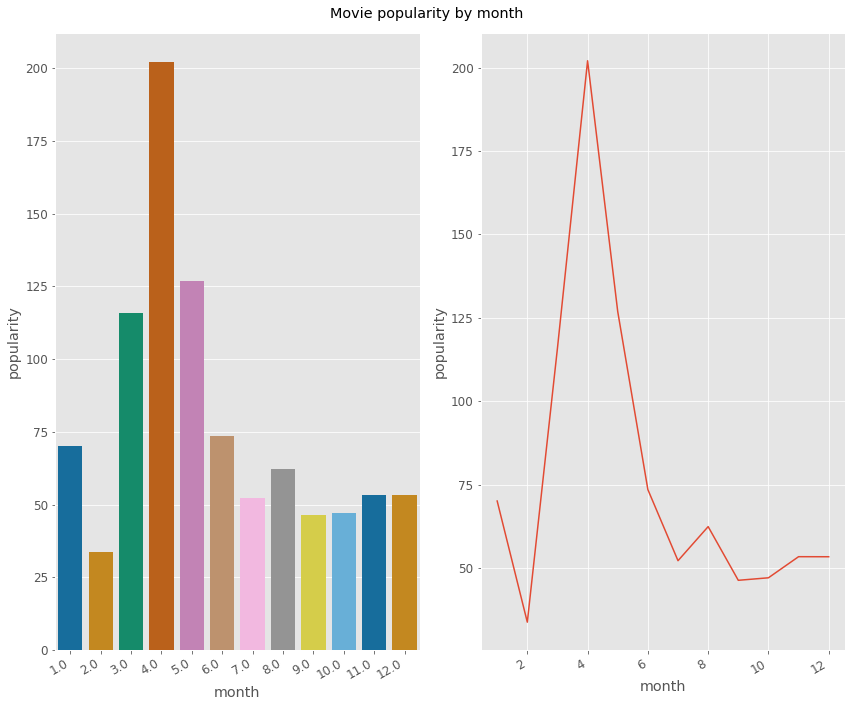

In [55]:
# create figure and axis
fig1, ((axs3, axs4)) = plt.subplots(1, 2)
fig1.autofmt_xdate()
fig1.suptitle('Movie popularity by month')

# plot bar chart
sns.barplot(
  data=df1,
  x='month', y='popularity', ci=None,
  palette='colorblind',
  ax=axs3
)

# plot line chart
sns.lineplot(
  data=df1,
  x='month', y='popularity', ci=None,
  palette='colorblind',
  ax=axs4
)

<AxesSubplot:xlabel='month', ylabel='vote_average'>

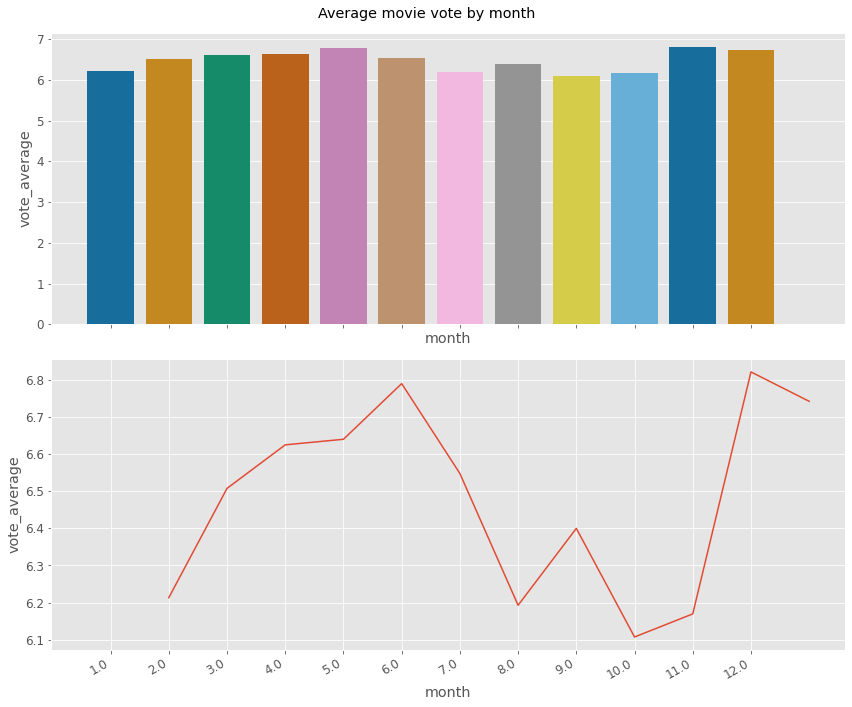

In [56]:
# create figure and axis
fig1, ((axs3, axs4)) = plt.subplots(2, 1, sharex=True)
fig1.autofmt_xdate()
fig1.suptitle('Average movie vote by month')

# plot bar chart
sns.barplot(
  data=df1,
  x='month', y='vote_average', ci=None,
  palette='colorblind',
  ax=axs3
)

# plot line chart
sns.lineplot(
  data=df1,
  x='month', y='vote_average', ci=None,
  palette='colorblind',
  ax=axs4
)

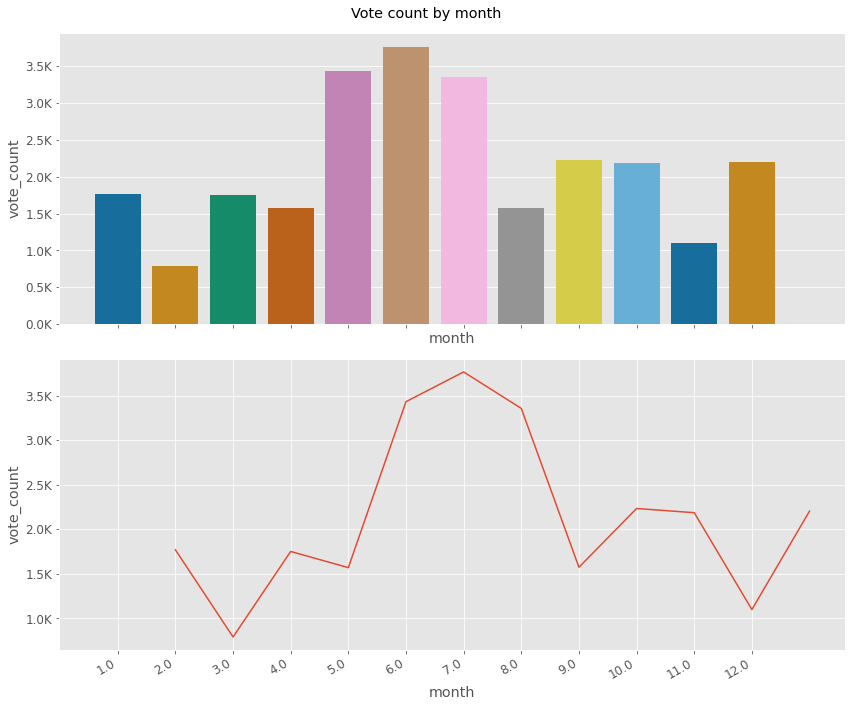

In [57]:
# create figure and axis
fig1, ((axs3, axs4)) = plt.subplots(2, 1, sharex=True)
fig1.autofmt_xdate()
fig1.suptitle('Vote count by month')

# plot bar chart
sns.barplot(
  data=df1,
  x='month', y='vote_count', ci=None,
  palette='colorblind',
  ax=axs3
)

# plot line chart
sns.lineplot(
  data=df1,
  x='month', y='vote_count', ci=None,
  palette='colorblind',
  ax=axs4
)

# set y-axis formatter
for axs in axs3, axs4:
  axs.yaxis.set_major_formatter(format_tsd)

<AxesSubplot:xlabel='day', ylabel='popularity'>

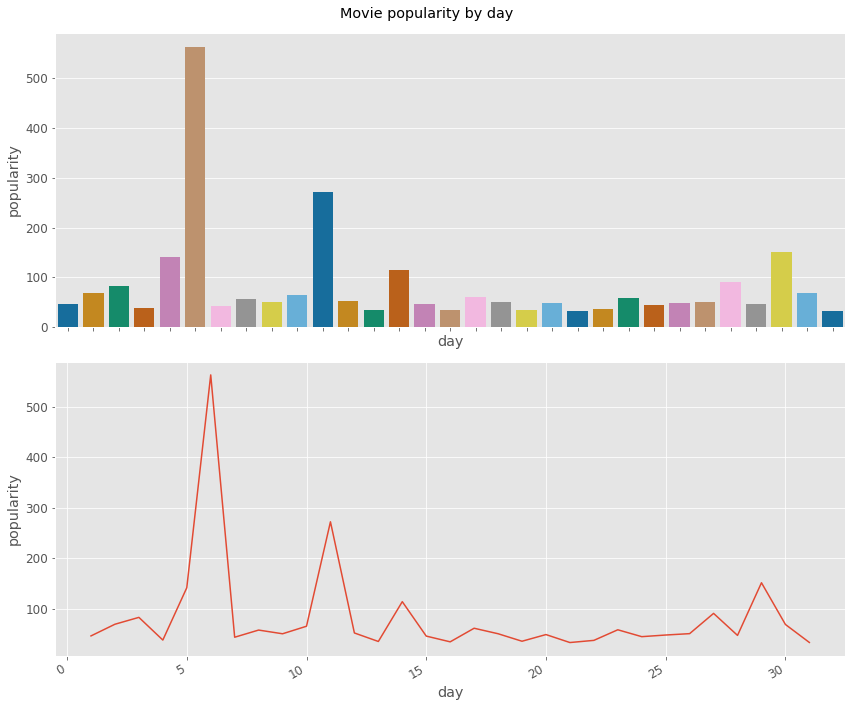

In [58]:
# create figure and axis
fig1, ((axs5, axs6)) = plt.subplots(2, 1)
fig1.autofmt_xdate()
fig1.suptitle('Movie popularity by day')

# plot bar chart
sns.barplot(
  data=df1,
  x='day', y='popularity', ci=None,
  palette='colorblind',
  ax=axs5
)

# plot line chart
sns.lineplot(
  data=df1,
  x='day', y='popularity', ci=None,
  palette='colorblind',
  ax=axs6
)

<AxesSubplot:xlabel='day', ylabel='vote_average'>

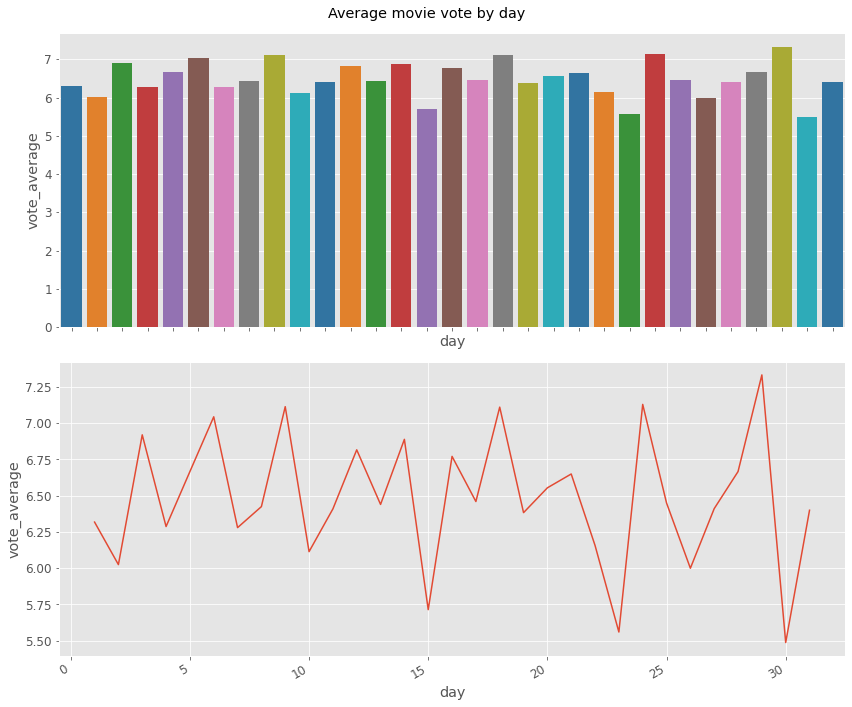

In [59]:
# create figure and axis
fig1, ((axs5, axs6)) = plt.subplots(2, 1)
fig1.autofmt_xdate()
fig1.suptitle('Average movie vote by day')

# plot bar chart
sns.barplot(
  data=df1,
  x='day', y='vote_average', ci=None,
  palette='tab10',
  ax=axs5
)

# plot line chart
sns.lineplot(
  data=df1,
  x='day', y='vote_average', ci=None,
  palette='colorblind',
  ax=axs6
)

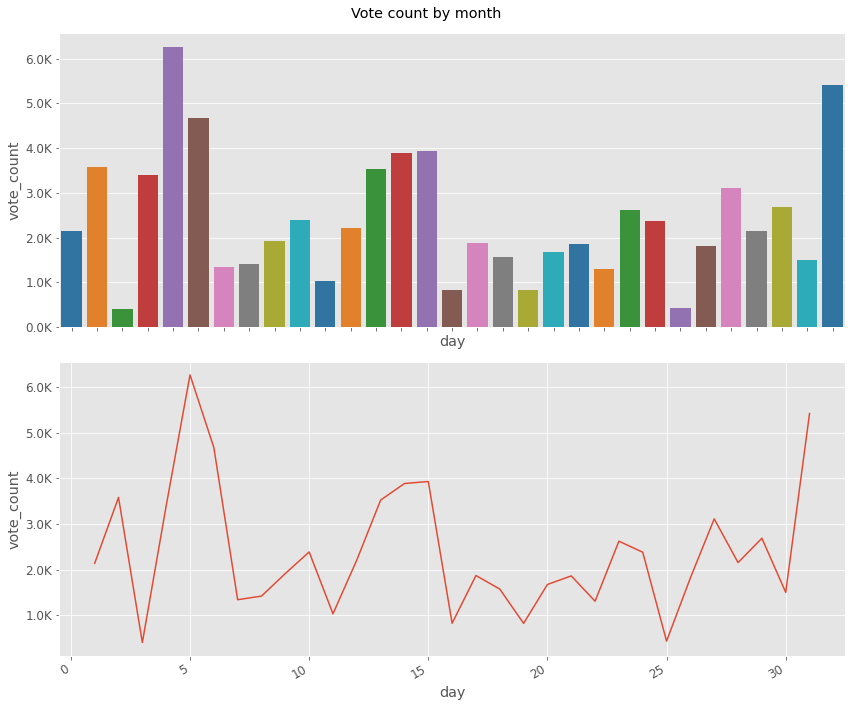

In [60]:
# create figure and axis
fig1, ((axs5, axs6)) = plt.subplots(2, 1)
fig1.autofmt_xdate()
fig1.suptitle('Vote count by month')

# plot bar chart
sns.barplot(
  data=df1,
  x='day', y='vote_count', ci=None,
  palette='tab10',
  ax=axs5
)

# plot line chart
sns.lineplot(
  data=df1,
  x='day', y='vote_count', ci=None,
  palette='colorblind',
  ax=axs6
)

# set y-axis formatter
for axs in axs5, axs6:
  axs.yaxis.set_major_formatter(format_tsd)

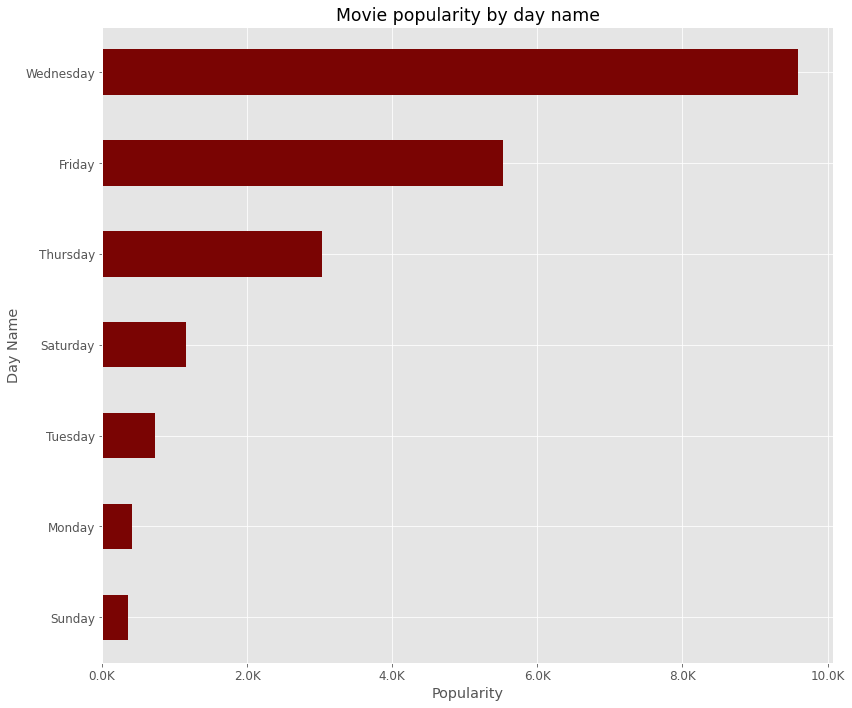

In [61]:
axs7 = df1[['day_name', 'popularity']] \
  .groupby('day_name') \
  .agg(np.sum)['popularity'].sort_values(ascending=True) \
  .plot(kind='barh', 
        grid=True,
        colormap=plt.cm.turbo_r)

# label plot axis
axs7.set(title='Movie popularity by day name', xlabel='Popularity', ylabel='Day Name')

# set x-axis formatter
axs7.xaxis.set_major_formatter(format_tsd)

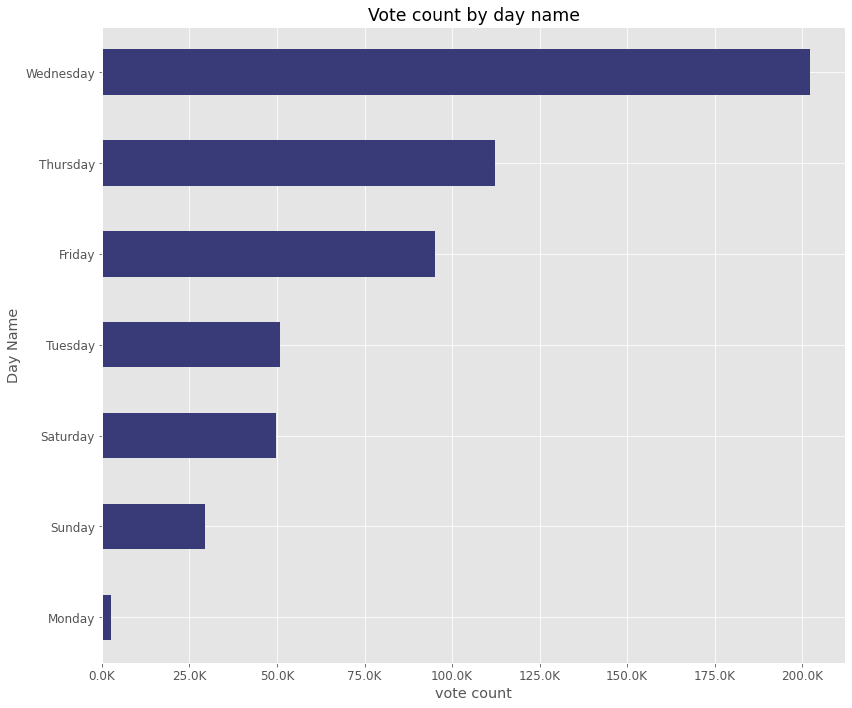

In [62]:
axs8 = df1[['day_name', 'vote_count']] \
  .groupby('day_name') \
  .agg(np.sum)['vote_count'].sort_values(ascending=True) \
  .plot(kind='barh', 
        grid=True,
        colormap=plt.cm.tab20b)

# label plot axes
axs8.set(title='Vote count by day name', xlabel='vote count', ylabel='Day Name')

# set x-axis formatter
axs8.xaxis.set_major_formatter(format_tsd)

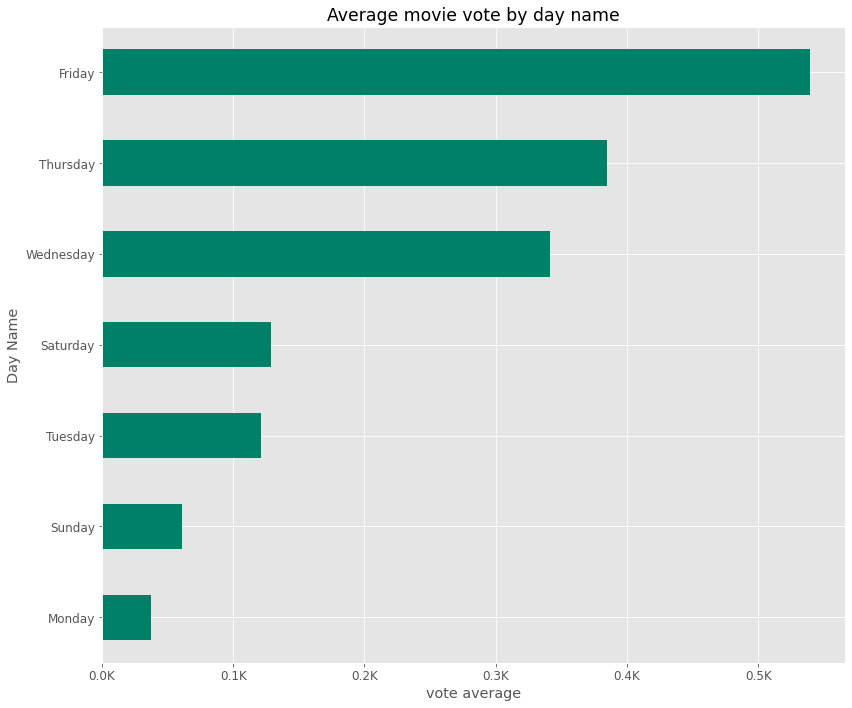

In [63]:
axs9 = df1[['day_name', 'vote_average']] \
  .groupby('day_name') \
  .agg(np.sum)['vote_average'].sort_values(ascending=True) \
  .plot(kind='barh', 
        grid=True,
        colormap=plt.cm.summer)

# label plot axes
axs9.set(title='Average movie vote by day name', xlabel='vote average', ylabel='Day Name')

# set x-axis formatter
axs9.xaxis.set_major_formatter(format_tsd)